<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/zeroRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wymiar pojedynczego obrazka: (7, 5)
Wymiar pojedynczego wiersza: (8, 7, 5)
Wymiar całej tablicy: (10, 8, 7, 5)
Ilość liczb: 80


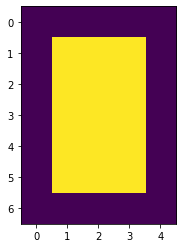

In [216]:
# Mnist recognition

import keras.preprocessing.image as kpi
from matplotlib import pyplot as plt
import numpy as np

def split_into_2D(image_name):
  # 2D array with single pictures
  array_2D = np.array([])

  # Load the main image
  main_img = kpi.load_img(image_name)

  # Convert to numpy array
  all_images = kpi.img_to_array(main_img)  # RGB 0-255 values
  all_images /= 255  # RGB 0-1 values

  # 70 x 40 x 3 - H x W x RGB
  array_shape = all_images.shape
  rows, columns = 10, 8
  # 7 x 5 x 3 - H x W x RGB
  single_img_shape = (array_shape[0] // 10, array_shape[1] // 8, array_shape[2])

  # Split entire array with all numbers to single images
  for i in range(rows):
    row = np.array([])
    for j in range(columns):
      # Create single 7x5x3 picture and remove RGB canal
      single_image = all_images[
        i*single_img_shape[0]:(i+1)*single_img_shape[0],
        j*single_img_shape[1]:(j+1)*single_img_shape[1]
      ][:, :, 0]
      # Append single 7x5 picture
      row = np.append(row, single_image)
    # Append 8 pictures (row of 7x5 single pictures)
    array_2D = np.append(array_2D, row)
  
  # Make 2D array with 7x5 pictures
  array_2D = array_2D.reshape(10, 8, 7, 5)
  print("Wymiar pojedynczego obrazka:", array_2D[0][0].shape)
  print("Wymiar pojedynczego wiersza:", array_2D[0].shape)
  print("Wymiar całej tablicy:", array_2D.shape)
  print("Ilość liczb:", array_2D.size // (7*5))

  return array_2D

def show_image(img):
  """Show 2D image from NumPy array"""
  plt.imshow(img)

if __name__ == "__main__":
  # An 2D array of single pictures
  images = split_into_2D('mnist.png')

  show_image(images[0][0])